# Escalas de medicion
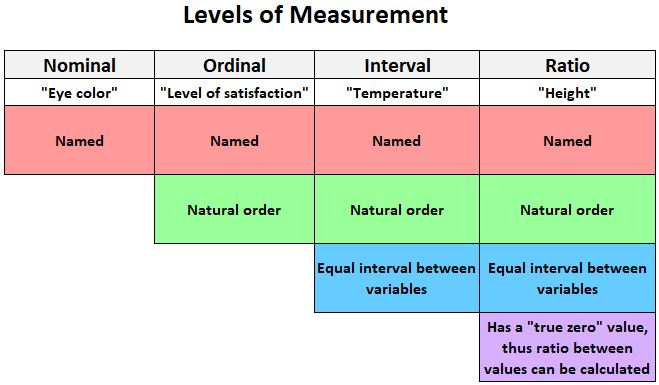

**Nominal:** Consiste en clasificar objetos o fenómenos, según ciertas características, tipologías o nombres, dándoles una denominación o símbolo, sin que implique ninguna relación de orden, distancia o proporción entre los objetos o fenómeno.

**Ejemplo** Cuando un producto se rotula de acuerdo al cumplimiento de las especificaciones de diseño como "conforme y no conforme". o "crítico, grave, y menor". No se obtienen valores numéricos y no se puede realizar un orden de las observaciones con sentido.

**Ordinal** Llamada también escala de orden jerárquico, con ella se establecen posiciones relativas de los objetos o fenómenos en estudio, respecto a alguna característica de interés, sin que se reflejen distancias entre ellos. Puede suceder que los objetos de una categoría de las escala no sean precisamente diferentes a los objetos de otra categoría de la escala, sino que están relacionados entre si.

**Ejemplo** Suponga que a los clientes en un almacen se les hace unas preguntas para valorar la calidad del servicio. Los clientes valoran la calidad de acuerdo a las siguientes respuestas: 1 (excelente), 2 (bueno), 3 (regular), 3 (malo) 4 (pésimo).

**Intervalo** Representa un nivel de medición más preciso, matemáticamente hablando, que las anteriores; no solo se establece un orden en las posiciones relativas de los objetos o individuos, sino que se mide también la distancia entre los intervalos o las diferentes categorías o clases.

**Ejemplo** Suponga que se está interesado en la temperatura del fundido de acero. Se toman cuatro lecturas cada dos horas: 2050, 2100, 2150, 2200 y 2250 F. Obviamente los datos pueden ser ordenados (semejante a los datos ordinales) en orden ascendente de temperatura indicando temperatura más fria, menos fria, y asi sucesivamente.

**Razon** Cuando una escala tiene todas las características de una escala de intervalo y además un punto cero real en su origen, se llama escala de razón. Además de distinción, orden y distancia, ésta es una escala que permite establecer en que proporción es mayor una categoría de una escala que otra. El cero absoluto o natural representa la nulidad de lo que se estudia.

**Ejemplo** Suponga que el peso de cuatro piezas fundidas de metal son 2.0, 2.1, 2.3 y 2.5 kg. El orden(ordinal) y la diferencia (intervalo) en los pesos puede ser comparado. Así, el incremento de peso de 2.0 a 2.1 es de 0.1 kg, el cual es el mismo que el que existe entre 2.3 y 2.4 kg

# Histograma

El histograma es una técnica gráfica utilizada para presentar gran cantidad de datos. Se le atribuye a Karl Pearson en 1895. El histograma puede ser: de **frecuencias absolutas, de frecuencias relativas, de frecuencias absolutas acumuladas y de frecuencias relativas acumuladas**. Para la construcción del histograma se requiere elaborar una tabla de distribución de frecuencias, lo cual se desarrollará a continuación.

El gráfico de la distribución de frecuencias, se llama histograma. El histograma de frecuencias es una representación visual de los datos en donde se evidencian fundamentalmente tres características: **forma, acumulación o tendencia posicional y dispersión o variabilidad**.

El histograma (de frecuencias) en si es una sucesión de rectángulos construidos sobre un sistema de coordenadas de la siguiente manera:

1. Las bases de los rectángulos se localizan en el eje horizontal. La longitud de la base es igual al ancho del intervalo.
2. Las alturas de los rectángulos se registran sobre el eje vertical y corresponden a las frecuencias de los intervalos.
3. Las áreas de los rectángulos son proporcionales a las frecuencias de las clases.

$$k= 1 + 3.3 log_{10} (n)$$


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\rodri\AppData\Local\Temp\ipykernel_20632\2679099951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde=False)


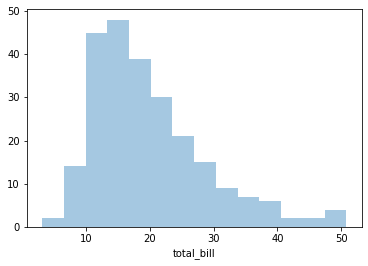

In [3]:
sns.distplot(tips['total_bill'], kde=False) 
plt.show()

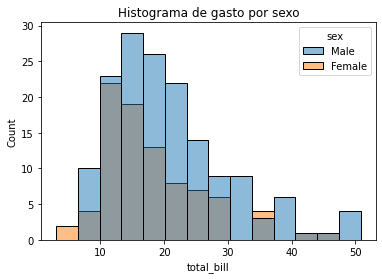

In [4]:
sns.histplot(data=tips,x='total_bill',hue='sex') 
plt.title('Histograma de gasto por sexo')
plt.show()

In [5]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill", nbins=10)
fig.update_layout(
    title="Comportamiento de total_bill",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

# Series de tiempo (Lineplot)

In [ ]:
import pandas as pd
df=pd.read_csv('accidents.csv',delimiter=";")
type(df)

In [ ]:
print(df.shape)
df.head()

In [ ]:
#Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?
df['DATE']=pd.to_datetime(df['DATE'])
monthly_accidents =df.groupby(df['DATE'].dt.to_period('M')).size()
monthly_accidents.plot.line()

# Facetgrid

In [ ]:
df['TIME']=pd.to_datetime(df['TIME'])
df['HOUR'] = df['TIME'].dt.hour

df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1
df1 = df1.reset_index()
df1.head(10)

df1 = pd.DataFrame({'count': df.groupby(['BOROUGH', 'HOUR']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='BOROUGH', margin_titles=True, col_wrap=3, aspect=2, row_order=df['BOROUGH'].unique)
chart.map(sns.barplot, 'HOUR', 'count',)

# Otros graficos 

In [ ]:
df_prueba=df[['DATE','BOROUGH']]
pie_borough = df_prueba.groupby('BOROUGH').agg('count')
pie_borough=pie_borough.rename(columns={'DATE': 'Frecuencia'})
pie_borough

In [ ]:
labels = pie_borough.index
print(labels)
pie, ax = plt.subplots(figsize=[10,6])
fig=plt.pie(x=pie_borough, autopct="%.1f%%",labels=labels,explode=[0.05]*5,\
            pctdistance=0.5)
plt.title("Distribucion de barrios", fontsize=14);


In [ ]:
pie_borough

In [ ]:
import plotly.express as px
fig = px.pie(pie_borough, values='Frecuencia', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.show()

In [ ]:
import plotly.express as px
fig = px.pie(pie_borough, values='Frecuencia', \
             names=pie_borough.index, title='Piechart Boroughs')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Medidas de tendencia central 

**Media** 
$$\bar{x} =\frac{\sum_{i=1}^n x_i}{n}$$

Para el caso de datos discretos agrupados:

$$\bar{x} =\sum_j x_j fr(x_j)$$
Para datos agrupados en clases, la media se calcula suponiendo que todos los datos de cada clase son idénticos al centro de la clase, con lo que,
llamando mj a estos valores centrales y fr (mj) a la frecuencia relativa de la
clase j, la fórmula se reduce a:
$$\bar{x} =\sum_j m_j fr(m_j)$$

**Media geometrica**
Muy utilizada en lo que son tasas de interes y aspectos financieros

$$B=\sqrt{x_1 *x_2 *\dots* x_n}$$

**Media armonica**
Se usa usualmente para calcular promedios espacio temporales 

$$C= \frac{n}{\sum_{i=1}^n \frac{1}{x_i}}$$

La media armonica siempre es la menor de las tres, la aritmetica la mayor y la geometrica un valor intermedio:

$$C< B<\bar{x}$$

**Media recortada** Es simplemente la media removiendo en la parte inferior y superior de los datos ordenados cierto porcentaje de los datos 

**Mediana y moda**
La mediana es un valor tal que, ordenados en magnitud los datos, el 50% es menor que ella y el 50% mayor. Por tanto, al ordenar los datos sin agrupar,
la mediana es el valor central, si su número es impar, o la media de los dos
centrales, si hay un número par

Para datos agrupados discretos se toma
como mediana el valor xm tal que
$$fr(x\leq x_a) <0.5$$
$$fr(x\leq x_b) >0.5$$

La moda simplemente es el valor mas frecuente





In [ ]:
import scipy 
scipy.stats.describe(monthly_accidents)

In [ ]:
scipy.stats.gmean(monthly_accidents) # Media geometrica

In [ ]:
scipy.stats.hmean(monthly_accidents) # Media armonica

In [ ]:
scipy.stats.trim_mean(monthly_accidents,0.1) # Media recortada (Proporcion removida en cada cola 10%)

In [ ]:
scipy.stats.mode(monthly_accidents) # Moda

# Medidas de dispersion

**Desviacion tipica** 

Promedio de las desviaciones de los datos respecto a la medida de centralización

$$s=\sqrt{\frac{\sum_{i=1}^n (x_i -\bar{x})^2}{n-1}}$$

Para datos agrupados es:

$$s=\sqrt{\sum_{i=1}^n (x_i -\bar{x})^2 fr(x_i)}$$

La información conjunta que proporcionan la media y la desviación típica
puede precisarse de la siguiente forma: entre la media y k veces la desviación
típica existe, como mínimo, el

$$100(1-\frac{1}{k^2})\%$$ de las observaciones.

Para dos desviaciones tipicas:

$$100(1-\frac{1}{2^2})\% = 75\% $$

A esto se conoce como la desigualdad de **Tchebychev**


**Coeficiente de variacion**

El coeficiente de variación es una medida relativa de variabilidad. En ingeniería
se utiliza mucho el coeficiente inverso,$\frac{|x|}{s}$, que se conoce como
coeficiente señal-ruido.

El coeficiente de variación en datos positivos de una población homogénea es típicamente menor que la unidad. Si este coeficiente es mayor que 1.5, conviene investigar posibles fuentes de heterogeneidad en los datos (medidas con distintos instrumentos; en personas de distinto sexo; en distintos momentos temporales, etc.).

**Mediana de las desviaciones absolutas**
La mediana de las desviaciones absolutas (MEDA) que tiene la ventaja, como la mediana, de no verse afectada por datos extremos.

$$MEDA= median|X_t - Mediana| $$

**Rango** Se denomina rango o recorrido de una variable la diferencia entre su valor máximo y mínimo

$$Rango = Max(X)- Min(X)$$


Llamaremos **percentil** p al menor valor superior al $p%$ de los datos. Por ejemplo, si el número de datos es impar,la mediana es el percentil 50. 

Llamaremos **cuartiles** a aquellos valores que dividen la distribución
en cuatro partes iguales. El primer cuartil, Q1, es por definición
igual al percentil 25, el segundo es la mediana y el tercero, Q3, el percentil
75, los percentiles y los cuartiles se utilizan para construir medidas de
dispersión basadas en los datos ordenados, como el **rango intercuartílico (IQR)**,
que es la diferencia entre los percentiles 75 y 25.

$$IQR= P_{75} -P_{25}$$

**Error estandar**
Desviación estándar de la muestra dividida por la raíz cuadrada del tamaño de la muestra (suponiendo la independencia estadística de los valores de la muestra).

$$SE= \frac{\sigma}{\sqrt{n}}$$



In [ ]:
monthly_accidents

In [ ]:
scipy.stats.describe(monthly_accidents) # Calcular el coeficiente de variacion

In [ ]:
scipy.stats.variation(monthly_accidents) # Calcular el coeficiente de variacion

In [ ]:
scipy.stats.iqr(monthly_accidents) # Calcular el IQR

In [ ]:
scipy.stats.sem(monthly_accidents) # Calcular el Error estandar

# Medidas de asimetria y kurtosis

Estas medidas informan sobre dos aspectos importantes de la forma de
la distribución: su grado de asimetría y su grado de homogeneidad. Al ser
medidas de forma, no dependen de las unidades de medida de los datos

**Asimetria** En un conjunto de datos simétricos respecto a su media $\bar{x}$, la suma $\sum (x-\bar{x})^3$ será nula, mientras que con datos asimétricos esta suma crecerá con la asimetría.
Para obtener una medida adimensional, se define el coeficiente de
asimetría mediante:

$$CA=\frac{\sum_{i=1}^n (x_i -\bar{x})^3}{ns^3}$$

Donde s es la desviación típica.

El signo del coeficiente de asimetría indica la forma de la distribución. 
1. Si este coeficiente es negativo, la distribución se alarga para valores inferiores a la media

2. Si el coeficiente es positivo, la cola de la distribución se extiende para valores superiores a la media

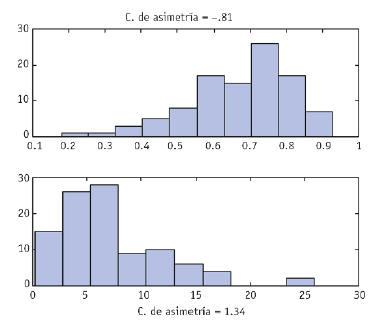



**Kurtosis** es una característica de como la frecuencia relativa se reparte entre el centro y los extremos


$$CA_p=\frac{\sum_{i=1}^n (x_i -\bar{x})^4}{ns^4}$$

Este coeficiente es siempre mayor
o igual que uno. El coeficiente de curtosis es importante porque nos informa respecto a la heterogeneidad de la distribución.

1. Si es muy bajo (menor de 2), indica una distribución mezclada
2. si es muy alto (mayor de 6), indica
la presencia de valores extremos atípicos.


In [ ]:
scipy.stats.skew(monthly_accidents) # Calcular el CA

In [ ]:
scipy.stats.kurtosis(monthly_accidents) # Calcular el CA_p

In [ ]:
plt.hist(monthly_accidents)

# Datos atipicos

Es muy frecuente que los datos presenten observaciones que contienen
errores de medida o de transcripción o que son heterogéneas con el resto
porque se han obtenido en circunstancias distintas. Llamaremos datos atípicos
a estas observaciones generadas de forma distinta al resto de los datos.


De muchos estudios se ha demostrado que esta proporcion puede variar entre un 1 y un 3% de una muestra. Incluso puede ser >5% si no hay cuidado en la recoleccion

**Como detectarlos?**

1. Un criterio simple es observaciones alejadas de la media más de
tres desviaciones típicas. Debido a que entre la media y tres desviaciones típicas debe estar al menos el 89%
de los datos. Un problema con esta regla es que si existen varios valores atípicos
muy grandes que distorsionan la media y la desviación típica, es posible
que los datos atípicos no sean identificados

2. Una regla mejor es utilizar valores de centralización y dispersión
que estén poco afectados por valores atípicos, como la mediana y la Meda, pero presenta el inconveniente de no tener en cuenta la asimetría de la distribución

$$x > Med \pm 4.5*MEDA$$

3. Usando el rango intercuartilico

$$x < Q_1 -1.5 IQR$$
$$x > Q_3 +1.5 IQR$$

$\color{red}{\textbf{OJO:}}$ **no siempre se deben eleminar los datos atipicos, a veces estos datos dicen mucho en un analisis descriptivo**

Para detectar atipicos se suele usar el **diagrama de caja o boxplot**

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=monthly_accidents)
plt.title('Boxplot de accidentes mensuales')
plt.xlabel('Accidentes')

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=tips.total_bill, x=tips.sex)
plt.title('Boxplot de accidentes mensuales')
plt.xlabel('Accidentes')

In [ ]:
import plotly.express as px
fig = px.box(tips, x="sex", y="total_bill")
fig.show()

In [ ]:
fig = px.box(tips, x="day", y="total_bill", color="smoker")
fig.show()